In [11]:
import pandas as pd
train_data=pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\apple_train_data.csv")
test_data=pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\apple_test_data.csv")
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059410,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


Text(0.5, 1.0, 'PACF')

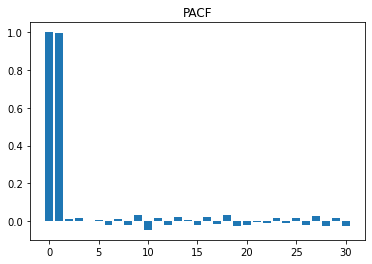

In [12]:
from statsmodels.tsa.stattools import acf, pacf
plt.bar(x=np.arange(0,31), height=pacf(train_data.Close))
plt.title("PACF")

Text(0.5, 1.0, 'ACF')

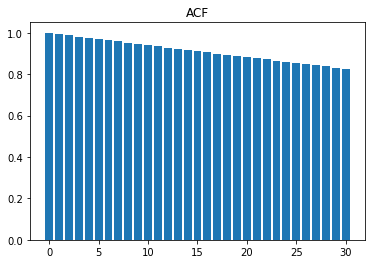

In [13]:
plt.bar(x=np.arange(0,31), height=acf(train_data.Close))
plt.title("ACF")

In [16]:
appl_train = train_data.Close.diff().fillna(0)
appl_test = test_data.Close.diff().fillna(0)
# Create lag
apple_train_lag = appl_train.shift(1).fillna(0)
apple_test_lag = appl_test.shift(1).fillna(0)

In [17]:
train_regression=pd.DataFrame(appl_train)
test_regression=pd.DataFrame(appl_test)
train_regression["Lag 1"]=apple_train_lag
test_regression["Lag 1"]=apple_test_lag

In [23]:
import statsmodels.api as sm
y = train_regression["Close"].iloc[-13:]
x = train_regression["Lag 1"].iloc[-13:]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                   0.01739
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.897
Time:                        19:20:37   Log-Likelihood:                -22.515
No. Observations:                  13   AIC:                             49.03
Df Residuals:                      11   BIC:                             50.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0559      0.415     -0.135      0.895      -0.969       0.857
Lag 1         -0.0362      0.274     -0.132      0.897      -0.640       0.568
==============================================================================
Omnibus:                        3.961   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.646
Skew:                           0.833   Prob(JB):                        0.439
Kurtosis:                       3.517   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pip install src

  Using cached src-0.0.7.zip (6.3 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for src
Failed to build src
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [43 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\src
  copying src\__init__.py -> build\lib\src
  running egg_info
  writing src.egg-info\PKG-INFO
  writing dependency_links to src.egg-info\dependency_links.txt
  writing entry points to src.egg-info\entry_points.txt
  writing requirements to src.egg-info\requires.txt
  writing top-level names to src.egg-info\top_level.txt
  reading manifest file 'src.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE.rst'
  writing manifest file 'src.egg-info\SOURCES.txt'
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\agnes\AppData\Local\Temp\pip-install-yaktn94j\src_6ec5263431494246bf77a946ed1974a4\set